# Estimating human population growth parameters

In this exercise, we will estimate the intrinsic growth rate $r$ and density-dependent growth rate $s$ for human population data using linear regression. This is basically just a way to draw a line with a slope and an intercept to data in a way that fits the data the best. There are fancy statistics associated with this technique, but we will focus only on the value estimates and not worry about them.

This technique is very general and we will use it throughout the course for many other data sets.

First we read human population data.

In [1]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──



✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1



Warning message:
“package ‘tidyr’ was built under R version 4.0.5”


Warning message:
“package ‘readr’ was built under R version 4.0.5”


── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
pop <- read_csv("https://bit.ly/34utiCg")
pop

Rows: 22 Columns: 2


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): year, population



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,population
<dbl>,<dbl>
1687,0.606
1750,0.795
1800,0.969
1850,1.265
1900,1.656
1920,1.860
1930,2.070
1940,2.300
1950,2.558


We can then plot the data over time

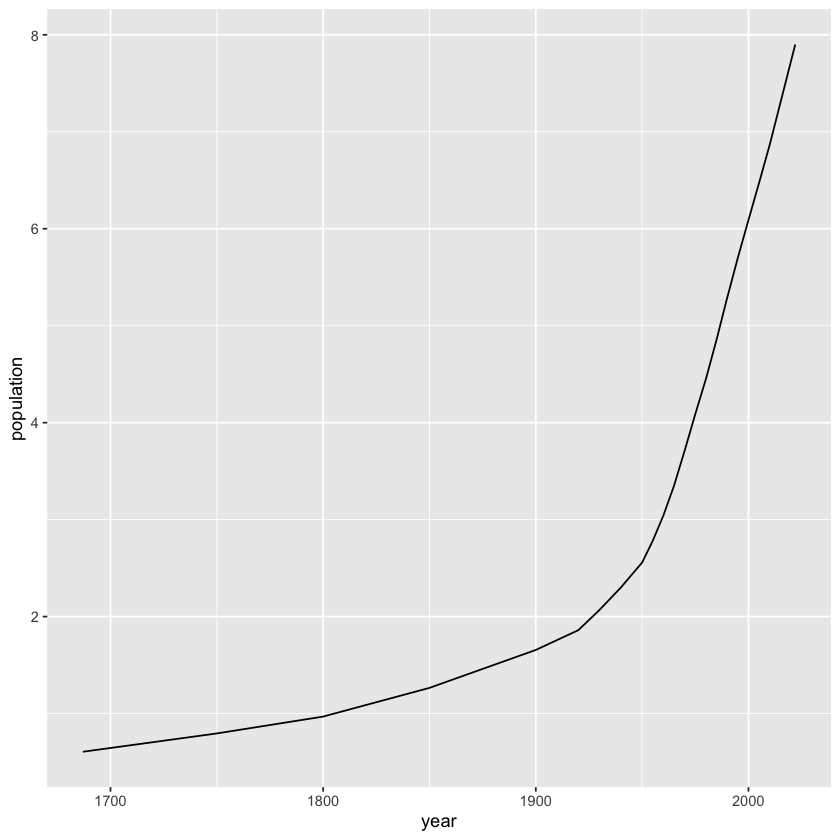

In [3]:
pop %>% ggplot(aes(x = year, y = population)) + geom_line()

As we can see the population continues to increase, with no obvious pattern. Is it exponential? Let's find out!
To do this, we will compute per capita population change

In [4]:
pop <- pop %>% mutate(perCapChange = (lead(population) - population)/population/(lead(year) - year))
pop

year,population,perCapChange
<dbl>,<dbl>,<dbl>
1687,0.606,0.004950495
1750,0.795,0.004377358
1800,0.969,0.006109391
1850,1.265,0.006181818
1900,1.656,0.006159420
1920,1.860,0.011290323
1930,2.070,0.011111111
1940,2.300,0.011217391
1950,2.558,0.017513683


Note: We are taking $\Delta N$ and $\Delta t$ using the `lead` command. All it code does is take all the values of a column pairwise, and subtracts the *leading* value from the one before it. This is why there is a `NA` in the last row -- there is no corresponding value for `lead` to take.

*Question:* Examine the new pop variable, at when did the human population have the highest per capita growth rate?

Warning message:
“Removed 1 rows containing missing values (geom_point).”


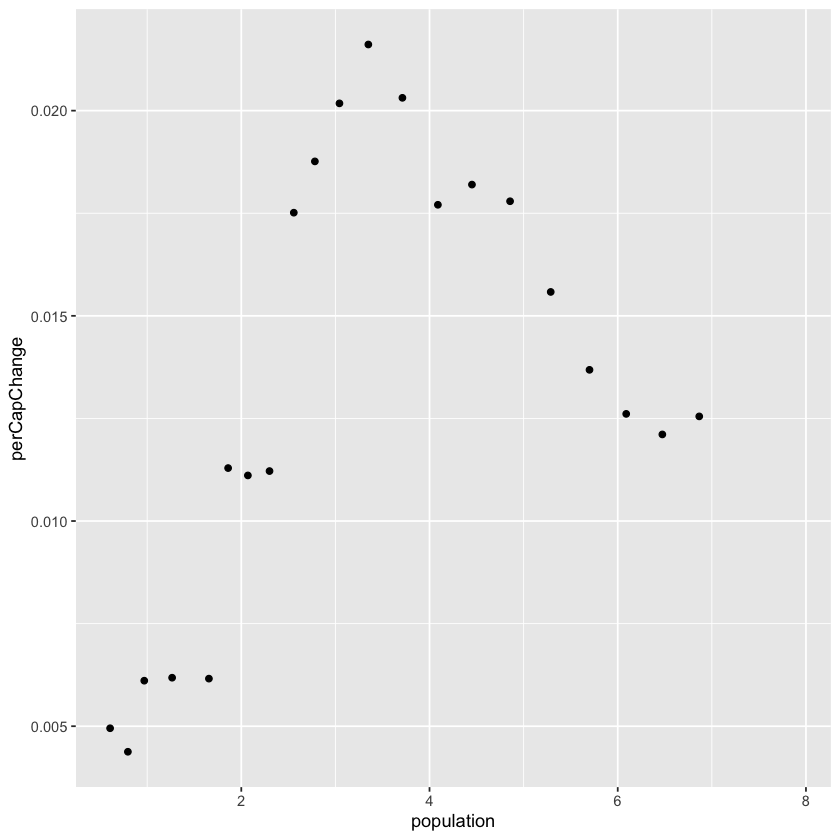

In [5]:
pop %>% ggplot(aes(x = population, y = perCapChange)) + geom_point()

Now we can see that something interesting is happening -- there is a change in how the population grows at about 3.4 billion people. We can a line with a slope $s$ and an intercept $r$ to the these data using linear regression.

We start at looking at the earlier time in the human population. The `lm` and `summary` commands fit the data and display the results, in that order

In [6]:
summary(lm(perCapChange ~ population, data = filter(pop, population < 3.4)))


Call:
lm(formula = perCapChange ~ population, data = filter(pop, population < 
    3.4))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0035636 -0.0010304  0.0004653  0.0011952  0.0023021 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0014347  0.0013535   -1.06    0.314    
population   0.0067378  0.0006376   10.57 9.56e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.001915 on 10 degrees of freedom
Multiple R-squared:  0.9178,	Adjusted R-squared:  0.9096 
F-statistic: 111.7 on 1 and 10 DF,  p-value: 9.558e-07


Note that `(Intercept)` is the x-intercept, or $r$. The variable `population` is the independent variable in the data and is the slope, or $s$.

Similarly, we can plot the values for the latter stage of the human population

In [7]:
summary(lm(perCapChange ~ population, data = filter(pop, population > 3.4)))


Call:
lm(formula = perCapChange ~ population, data = filter(pop, population > 
    3.4))

Residuals:
       Min         1Q     Median         3Q        Max 
-1.067e-03 -8.213e-04 -1.439e-05  5.409e-04  1.133e-03 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0296044  0.0015462  19.147 2.64e-07 ***
population  -0.0026489  0.0002874  -9.217 3.65e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0008867 on 7 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9239,	Adjusted R-squared:  0.913 
F-statistic: 84.95 on 1 and 7 DF,  p-value: 3.653e-05


We can plot the lines with the parameter estimates, which gives us Figure 6.3 from the textbook.

Warning message:
“Removed 1 rows containing missing values (geom_point).”


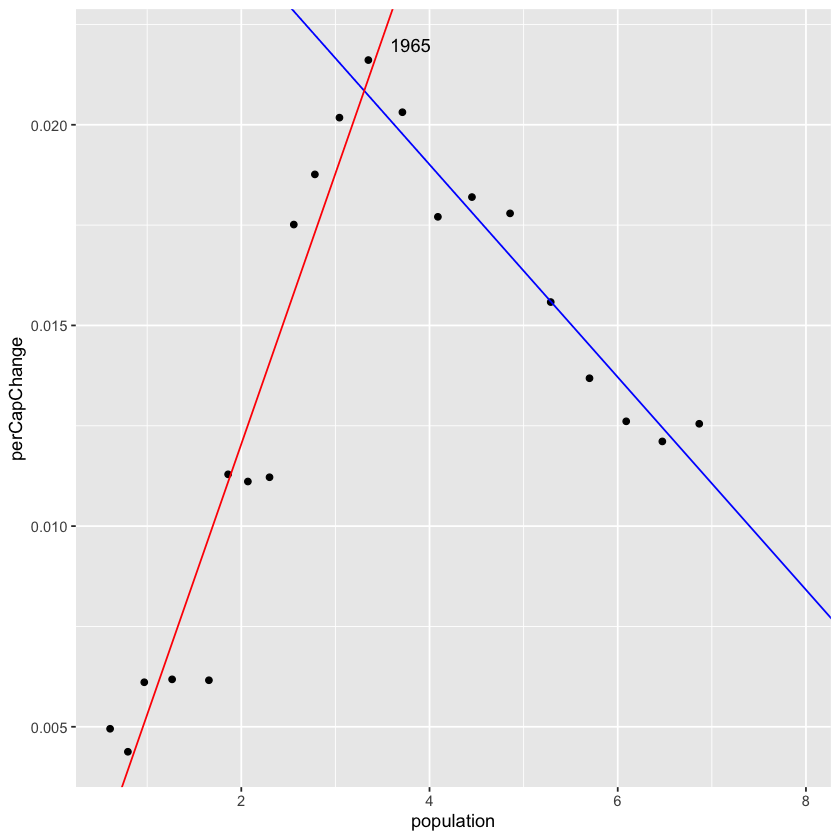

In [8]:
pop %>% ggplot(aes(x = population, y = perCapChange)) + geom_point() +
  geom_abline(intercept = 0.0296044, slope =-0.0026489, color = "blue") +
  geom_abline(intercept = -0.0014347, slope =0.0067378, color = "red") +
  annotate("text", x = 3.8, y = .022, label = "1965")